<a href="https://colab.research.google.com/github/ZynTran/Yolo/blob/main/th%C3%B9ng_h%C3%A0ng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ppduyn/thng-hng")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/thng-hng


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Nhãn lỗi của thùng hàng
box_classes = ['code', 'móp', 'rách']
image_size = 64

data = []
labels = []

# Đường dẫn dữ liệu từ KaggleHub
path = "/kaggle/input/thng-hng"

# Duyệt qua từng lớp
for i, cls in enumerate(box_classes):
    folder = os.path.join(path, 'box', cls)
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        try:
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (image_size, image_size))
                img = img / 255.0
                data.append(img)
                labels.append(i)
        except:
            continue

# Chuyển về mảng numpy
data = np.array(data)
labels = np.array(labels)

# Chia train/test
x_train, x_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42, stratify=labels
)

In [ ]:
y_train = to_categorical(y_train, num_classes=len(box_classes))
y_test = to_categorical(y_test, num_classes=len(box_classes))

In [ ]:
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout, Flatten, Conv2D, MaxPooling2D

In [ ]:
model=Sequential([Conv2D(32, kernel_size=(3, 3),activation='relu', input_shape=(image_size, image_size, 3)),
                  MaxPooling2D((2,2)),
                  Conv2D(64, (3, 3), activation='relu'),
                  Flatten(),
                  Dense(64, activation='relu'),
                  Dense(len(box_classes), activation='softmax')
                  ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
epochs=20
history=model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test))
model.save('face_model.h5')

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 264ms/step - accuracy: 0.4186 - loss: 1.0857 - val_accuracy: 0.4118 - val_loss: 1.0857
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - accuracy: 0.4147 - loss: 1.0838 - val_accuracy: 0.4118 - val_loss: 1.0859
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 188ms/step - accuracy: 0.4108 - loss: 1.0848 - val_accuracy: 0.4118 - val_loss: 1.0869
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 255ms/step - accuracy: 0.4460 - loss: 1.0743 - val_accuracy: 0.4118 - val_loss: 1.0877
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 286ms/step - accuracy: 0.3991 - loss: 1.0922 - val_accuracy: 0.4118 - val_loss: 1.0871
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 234ms/step - accuracy: 0.4225 - loss: 1.0820 - val_accuracy: 0.4118 - val_loss: 1.0867
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - accuracy: 0.4108 - loss: 1.0838 - val_accuracy: 0.4118 - val_loss: 1.0863
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.4186 - loss: 1.0857 - val_accuracy: 0.4118 - val_loss:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


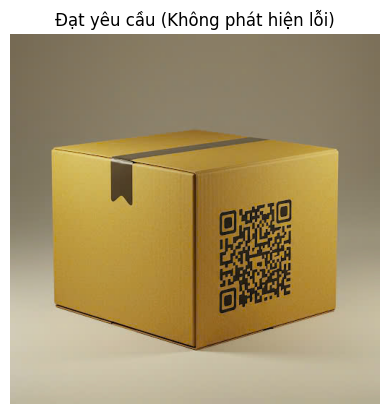

Dự đoán thùng hàng: Không phát hiện lỗi
Đánh giá tổng quát: Đạt yêu cầu


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


box_classes = ['code', 'móp', 'rách']
threshold = 0.6

# Hàm tiền xử lý ảnh
def preprocess_image(image_path, image_size=64):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Không thể đọc ảnh: {image_path}")
    img = cv2.resize(img, (image_size, image_size))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)  # shape: (1, 64, 64, 3)
    return img

# Đường dẫn ảnh cần kiểm tra
image_path = '/code.jpg'

# Tiền xử lý và dự đoán
processed_image = preprocess_image(image_path)
predictions = model.predict(processed_image)[0]
predicted_class = np.argmax(predictions)
confidence = predictions[predicted_class]

# Kiểm tra nếu xác suất lớn hơn ngưỡng, kết quả là lỗi
if confidence < threshold:
    result = "Đạt yêu cầu"
    predicted_label = "Không phát hiện lỗi"
else:
    result = "Không đạt yêu cầu"
    predicted_label = box_classes[predicted_class]

# Hiển thị ảnh và kết quả
img_display = cv2.imread(image_path)
img_display = cv2.cvtColor(img_display, cv2.COLOR_BGR2RGB)
plt.imshow(img_display)
plt.axis('off')
plt.title(f"{result} ({predicted_label})")
plt.show()

# In ra kết quả
print(f"Dự đoán thùng hàng: {predicted_label}")
print(f"Đánh giá tổng quát: {result}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Xác suất của từng lớp:
code: 0.3859
móp: 0.5439
rách: 0.0702


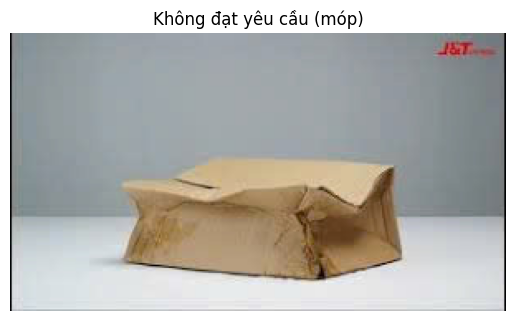

Dự đoán thùng hàng: móp
Đánh giá tổng quát: Không đạt yêu cầu


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


box_classes = ['code', 'móp', 'rách']
threshold = 0.5

# Hàm tiền xử lý ảnh
def preprocess_image(image_path, image_size=64):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Không thể đọc ảnh: {image_path}")
    img = cv2.resize(img, (image_size, image_size))
    img = img / 255.0  # Normalize ảnh
    img = np.expand_dims(img, axis=0)  # shape: (1, 64, 64, 3)
    return img

# Tiền xử lý và dự đoán
image_path = '/thùnghafng 2.jpg'
processed_image = preprocess_image(image_path)
predictions = model.predict(processed_image)[0]
predicted_class = np.argmax(predictions)
confidence = predictions[predicted_class]

# In ra tất cả các xác suất để kiểm tra
print("Xác suất của từng lớp:")
for i, class_name in enumerate(box_classes):
    print(f"{class_name}: {predictions[i]:.4f}")

# Kiểm tra xác suất cao nhất để quyết định lỗi
if predictions[2] >= threshold:
    result = "Không đạt yêu cầu"
    predicted_label = "rách"
elif confidence < threshold:
    result = "Đạt yêu cầu"
    predicted_label = "Không phát hiện lỗi"
else:
    result = "Không đạt yêu cầu"
    predicted_label = box_classes[predicted_class]

# Hiển thị ảnh và kết quả
img_display = cv2.imread(image_path)
img_display = cv2.cvtColor(img_display, cv2.COLOR_BGR2RGB)
plt.imshow(img_display)
plt.axis('off')
plt.title(f"{result} ({predicted_label})")
plt.show()

# In ra kết quả
print(f"Dự đoán thùng hàng: {predicted_label}")
print(f"Đánh giá tổng quát: {result}")